In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
Real = pd.read_csv('./True.csv')
Fake = pd.read_csv('./Fake.csv')

In [3]:
Real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Data preprocessing

In [4]:
Real['Label'] = "Real"
Fake['Label'] = "Fake"

In [5]:
Real.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


In [6]:
merged = pd.concat([Real, Fake], ignore_index=True)

In [7]:
# Merging the two file
merged = merged.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
merged.head()

,title,text,subject,date,Label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",Fake
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",Fake
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",Fake
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",Real
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",Fake


In [9]:
merged.to_csv("Real_Fake_news.csv", index=False)

In [10]:
merged.head()

,title,text,subject,date,Label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",Fake
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",Fake
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",Fake
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",Real
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",Fake


In [11]:
merged.tail()

,title,text,subject,date,Label
44893,Nigeria says U.S. agrees delayed $593 million ...,ABUJA (Reuters) - The United States has formal...,worldnews,"December 27, 2017",Real
44894,Boiler Room #62 – Fatal Illusions,Tune in to the Alternate Current Radio Network...,Middle-east,"June 29, 2016",Fake
44895,ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...,I m convinced the Freedom From Religion group...,Government News,"Feb 27, 2016",Fake
44896,Republican tax plan would deal financial hit t...,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,"November 2, 2017",Real
44897,U.N. refugee commissioner says Australia must ...,SYDNEY (Reuters) - The U.N. High Commissioner ...,worldnews,"November 1, 2017",Real


In [12]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [13]:
merged.isna().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [14]:
merged.columns

Index(['title', 'text', 'subject', 'date', 'Label'], dtype='object')

In [15]:
merged['subject'].unique()

array(['News', 'politicsNews', 'politics', 'worldnews', 'Government News',
       'left-news', 'Middle-east', 'US_News'], dtype=object)

In [16]:
# Removing the special character
merged['title'] = merged['title'].str.replace(r'[@#!?]', '', regex=True)
merged['text'] = merged['text'].str.replace(r'[@#!?]', '', regex=True)

In [17]:
merged.head()

,title,text,subject,date,Label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",Fake
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",Fake
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",Fake
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",Real
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",Fake


In [18]:
# Lowercasing the the uppercased text
merged['title'] = merged['title'].str.lower()
merged['text'] = merged['text'].str.lower()

In [19]:
merged.head()

,title,text,subject,date,Label
0,breaking: gop chairman grassley has had enoug...,"donald trump s white house is in chaos, and th...",News,"July 21, 2017",Fake
1,failed gop candidates remembered in hilarious...,now that donald trump is the presumptive gop n...,News,"May 7, 2016",Fake
2,mike pence’s new dc neighbors are hilariously...,mike pence is a huge homophobe. he supports ex...,News,"December 3, 2016",Fake
3,california ag pledges to defend birth control ...,san francisco (reuters) - california attorney ...,politicsNews,"October 6, 2017",Real
4,az ranchers living on us-mexico border destroy...,twisted reasoning is all that comes from pelos...,politics,"Apr 25, 2017",Fake


In [20]:
# Removing the numbers from the text
merged['title'] = merged['title'].str.replace('\d+', '', regex=True)
merged['text'] = merged['text'].str.replace('\d+', '', regex=True)

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [22]:
# Getting the list of stopword in english
stopword_list = stopwords.words('english')

In [23]:
# Creating the function to remove the stopwords from a text
def remove_stopwords(text):
    tokens = word_tokenize(text)
#     Removing the stopwords and return the filtered tokens
    filtered_tokens = [word for word in tokens if word.lower() not in stopword_list]
    return ' '.join(filtered_tokens)

In [24]:
# Applying the function to the required columns
merged['title'] = merged['title'].apply(remove_stopwords)
merged['text'] = merged['text'].apply(remove_stopwords)

In [25]:
from nltk.stem import WordNetLemmatizer

lemmitized = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text)
    
#     Lemmitize each and every token and return the lemmitized text
    lemmatized_token = [lemmitized.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_token)

In [26]:
merged['title']  = merged['title'].apply(lemmatize_text)
merged['text']  = merged['text'].apply(lemmatize_text)

# Feature Extraction

In [27]:
merged['combined_text'] = merged['title'] + " " + merged['text']

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [29]:
# Initiliazing TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Transform the combined text into numerical values
X = tfidf_vectorizer.fit_transform(merged['combined_text'])

In [30]:
y = merged['Label']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=666)

# Model Selection and Training

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
# Initialiing the logistic regression modle
logistic_regression = LogisticRegression()


In [33]:
# Train the model
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = logistic_regression.predict(X_test)

In [35]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)

In [36]:
print(f"Accuracy: {accuracy:.4f}")
print("\n Classification Report: \n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9883

 Classification Report: 
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4654
        Real       0.99      0.99      0.99      4326

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


 Confusion Matrix:
 [[4596   58]
 [  47 4279]]


In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# Defining the parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1,10],
    'solver': ['liblinear', 'lbfgs']
}


In [39]:
grid_search = GridSearchCV(LogisticRegression(), param_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [40]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 10],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [41]:
# Getting the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'solver': 'liblinear'}


In [42]:
# Use the best estimator for prediction 
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Best model Accuracy: {accuracy:.4f}')
print("\n Classificaiton Report:\n", classification_report(y_test, y_pred))

Best model Accuracy: 0.9938

 Classificaiton Report:
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4654
        Real       0.99      0.99      0.99      4326

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [44]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:\n", cm)


 Confusion Matrix:
 [[4625   29]
 [  27 4299]]


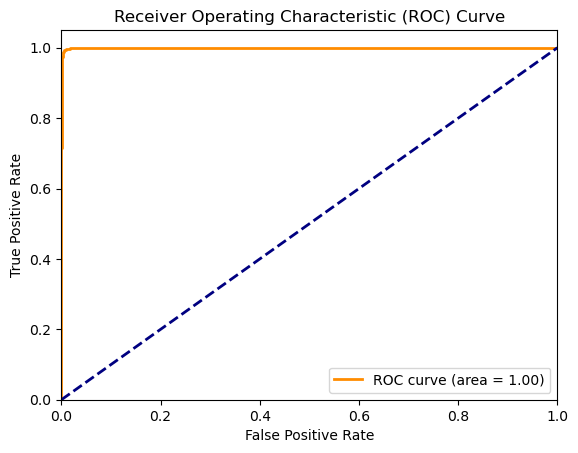

In [45]:
from sklearn.metrics import roc_curve, auc

# Map 'Fake' to 0 and 'Real' to 1
y_test_numeric = y_test.map({'Fake': 0, 'Real': 1})

# Getting the predicted probablities
y_prob = best_model.predict_proba(X_test)[:,1]

# Calculating the roc curve
fpr, tpr, thresholds =  roc_curve(y_test_numeric, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [46]:
import pickle
with open("tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(tfidf_vectorizer, file)
print("TF-IDF Vectorizer saved successfully")

TF-IDF Vectorizer saved successfully


In [48]:
with open("fake_news_detection_model.pkl", "wb") as file:
    pickle.dump(best_model, file)
print("Model saved successfully")

Model saved successfully


In [49]:
# Load the model and check its type
with open("fake_news_detection_model.pkl", "rb") as file:
    model = pickle.load(file)
print(type(model))

<class 'sklearn.linear_model._logistic.LogisticRegression'>
